In [9]:
import os
import numpy as np
import pandas as pd
from summarytools import dfSummary
import warnings 


import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline


import pickle 
from imblearn.under_sampling import RandomUnderSampler

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, roc_auc_score
import sklearn.metrics as metrics

pd.set_option('display.max_columns', None)
plt.style.use('ggplot')
warnings.filterwarnings('ignore') 


data_path = os.getcwd() + "/data/"
if not os.path.exists(data_path):
    os.makedirs(data_path)

# Load data and keep orders with 5 items or more

In [2]:
df_base = pd.read_parquet(data_path + 'feature_frame.parquet')

In [3]:
items_ordered = df_base[df_base['outcome'] == 1].groupby('order_id')['variant_id'].count().reset_index().rename(columns={"variant_id": "order_size"})

df_orders = pd.merge(left=df_base, right=items_ordered, 
                    how='left', left_on=['order_id'], right_on=['order_id'])

df_orders = df_orders[df_orders['order_size'] >= 5]
df_orders.head()

,variant_id,product_type,order_id,user_id,created_at,order_date,user_order_seq,outcome,ordered_before,abandoned_before,active_snoozed,set_as_regular,normalised_price,discount_pct,vendor,global_popularity,count_adults,count_children,count_babies,count_pets,people_ex_baby,days_since_purchase_variant_id,avg_days_to_buy_variant_id,std_days_to_buy_variant_id,days_since_purchase_product_type,avg_days_to_buy_product_type,std_days_to_buy_product_type,order_size
0,33826472919172,ricepastapulses,2807985930372,3482464092292,2020-10-05 16:46:19,2020-10-05,3,0.0,0.0,0.0,0.0,0.0,0.081052,0.053512,clearspring,0.000000,2.0,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618,9.0
1,33826472919172,ricepastapulses,2808027644036,3466586718340,2020-10-05 17:59:51,2020-10-05,2,0.0,0.0,0.0,0.0,0.0,0.081052,0.053512,clearspring,0.000000,2.0,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618,6.0
2,33826472919172,ricepastapulses,2808099078276,3481384026244,2020-10-05 20:08:53,2020-10-05,4,0.0,0.0,0.0,0.0,0.0,0.081052,0.053512,clearspring,0.000000,2.0,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618,9.0
3,33826472919172,ricepastapulses,2808393957508,3291363377284,2020-10-06 08:57:59,2020-10-06,2,0.0,0.0,0.0,0.0,0.0,0.081052,0.053512,clearspring,0.038462,2.0,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618,13.0
5,33826472919172,ricepastapulses,2808434524292,3479090790532,2020-10-06 10:50:23,2020-10-06,3,0.0,0.0,0.0,0.0,0.0,0.081052,0.053512,clearspring,0.038462,2.0,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618,7.0


In [5]:
dfSummary(df_orders)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,variant_id[int64],Mean (sd) : 34010222998353.5 (277529437979.2)min < med < max:33615294398596.0 < 33973246886020.0 < 34543002157188.0IQR (CV) : 481409925120.0 (122.5),976 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8g+/7EAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABn0lEQVR4nO3bMVLCQBiG4ehY0OikoKfXgit4BsZzcgZP4B3oLSiRBjs6DSSbyX47z9NnZouXWfbP5uFyuXRQu8elFwC3ECoRnpZewH82m8173/frMc8ej8fvw+HwWXhJLKTqUPu+X+92u58xz+73+1GBUydbPxGESgShEkGoRBAqEQZP/UZE1GAwVCMiamDrJ4JQiSBUIgiVCEIlglCJIFQiCJUIQiWCUIkgVCIIlQhCJYJQiSBUIlT9uTT3a/Wiu1Ab0+pFd1s/EYRKBKESQahEECoRhEoEoRJBqEQQKhGESgShEsG7fq5Op9Prdrv9GPv8nJdahMrVarV6GXuhpevmvdRi6yeCUIkgVCIIlQhCJYJQiSBUIpijzqDVL0GXJNQZtPol6JKaDbXm14Hcr9lQa34dyP2aDTXV1J3gfD6/dV33VXBJVRBqZQrsBM8l11MLoVLMlN1g6EwgVIqZshsMnQkM/IkgVCIIlQhCJcKshykzQUqZNdTkmeCUH5kfWHnGU3+YOGppcui+JP9RiSBUIgiVCEIlglCJIFQi/AIo0YbUp7tkZQAAAABJRU5ErkJggg=="">",0(0.0%)
2,product_type[object],1. tinspackagedfoods2. condimentsdressings3. ricepastapulses4. haircare5. longlifemilksubstitutes6. cookingingredientsoils7. dishwasherdetergent8. cereal9. bathroomlimescalecleaner10. kidssnacks11. other,"169,541 (7.8%)97,681 (4.5%)96,554 (4.5%)86,704 (4.0%)83,162 (3.8%)83,064 (3.8%)74,033 (3.4%)68,302 (3.2%)62,420 (2.9%)54,406 (2.5%)1,288,086 (59.5%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8g+/7EAAAACXBIWXMAAA9hAAAPYQGoP6dpAAADPElEQVR4nO3cMWoCURhG0RiygClSu5aswYW6hmzF3uK1qUwbGBUD824gntMPvOLC3/i5u1wuL1B4/esH8DzERkZsZMRGRmxkxEZGbGTERkZsZMRGZrff7z+WZXl/9IMxxvl0On1OfBP/1NuyLO+Hw+Hr0Q+Ox+PDYcJPzigZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkXkbY5x/84PIMcZ55oP4v3b+xYiKM0pGbGTurqssqdjS3XWVJRVbckbJiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MjcHbwYt7AlgxcyzigZsZExeCFj8ELGGSUjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiI2PwQsbghYwzSkZsZMRG5ua6yrKKrd1cV1lWsTVnlIzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNzM11lWUVW7OuIuOMkhEbGYMXMgYvZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyBi9kDF7IOKNkxEbG4IWMwQsZZ5SM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyFhXkbGuIuOMkhEbmavrKssqZri6rrKsYgZnlIzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNzNXBi7ELMxi8kHFGyYiNjMELGYMXMs4oGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZgxcyBi9knFEyYiMjNjKrdZVlFbOs1lWWVczijJIRGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkVmtqyyrmMW6iowzSkZsZAxeyBi8kHFGyYiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIGLyQMXgh44ySERuZ1eCFuZ55ULQavDDXMw+KnFEyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjKrwQtzPfOgyOCFjDNKRmxkxEZGbGTERkZsZMRGRmxkxEZGbGS+AYp0FslymfnKAAAAAElFTkSuQmCC"">",0(0.0%)
3,order_id[int64],Mean (sd) : 2970614701897.8 (237764426887.6)min < med < max:2807985930372.0 < 2900908834948.0 < 3643294515332.0IQR (CV) : 48388341760.0 (12.5),"2,603 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8g+/7EAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABSklEQVR4nO3dsU3DUBRA0YBokVykzwAswQwZ1DNkAnZwn8ItaUKLkCCRnQguOqe1nvWLK/3iF+/hfD5v4K97/O0DwDWESsLTPX++2+1eh2HYLp2f5/k4TdPhhkci6q6hDsOw3e/370vnx3FcHDn/i6ufBKGSIFQShEqCUEkQKglCJUGoJAiVBKGScPEJdc17/el0etlsNm9LZuGzi6Guea8fx/F5yRx85eonQagkCJUEoZIgVBKESoJQSRAqCUIlQagkCJUEoZIgVBKESoJQSRAqCUIlQagkCJUEoZIgVBKESoJQSRAqCUIlQagkCJUEoZIgVBKESoJQSRAqCUIlQagkCJUEoZIgVBKESsLF9T1wrTU7yeZ5Pk7TdPjuu1C5mZU7yX4M3NVPglBJECoJQiVBqCQIlQShkiBUEoRKglBJECoJQiVBqCR8AMSNJUk32nbBAAAAAElFTkSuQmCC"">",0(0.0%)
4,user_id[int64],Mean (sd) : 3731337850014.8 (184517975869.9)min < med < max:3046041190532.0 < 3806872141956.0 < 5023380701316.0IQR (CV) : 341070675968.0 (20.2),"1,517 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMiwgaHR0cHM6Ly9tYXRwbG90bGliLm

# Milestone 1

LOGISTIC REGRESSION

Null values
Feature engineering (remove higly correlated variables)

How to encode categorical variables


Qué pasa con clientes nuevos?

Hay que balancear el data set?

Overfitting?

Feature Engineering? Tener en cuenta RFM?
Recency: indicating how recent a customer made a purchase.
Frequency: How often or the number of times a customer purchases.
Monetary Value/Revenue: The amount of money a customer spends when making a purchase at a point in time.

In [4]:
info_cols = ['varian_id', 'order_id', 'user_id', 'created_at', 'order_date']
label_col = ['outcome']
features_cols = [col for col in df_orders.columns if col not in info_cols + [label_col]]

categorical_cols = ['product_type', 'vendor']
binary_cols = ['ordered_before', 'abandoned_before', 'active_snoozed', 'set_as_regular']
numerical_cols = [col for col in features_cols if col not in categorical_cols + binary_cols]

array([[<Axes: title={'center': 'variant_id'}>,
        <Axes: title={'center': 'order_id'}>,
        <Axes: title={'center': 'user_id'}>,
        <Axes: title={'center': 'created_at'}>,
        <Axes: title={'center': 'order_date'}>],
       [<Axes: title={'center': 'user_order_seq'}>,
        <Axes: title={'center': 'outcome'}>,
        <Axes: title={'center': 'ordered_before'}>,
        <Axes: title={'center': 'abandoned_before'}>,
        <Axes: title={'center': 'active_snoozed'}>],
       [<Axes: title={'center': 'set_as_regular'}>,
        <Axes: title={'center': 'normalised_price'}>,
        <Axes: title={'center': 'discount_pct'}>,
        <Axes: title={'center': 'global_popularity'}>,
        <Axes: title={'center': 'count_adults'}>],
       [<Axes: title={'center': 'count_children'}>,
        <Axes: title={'center': 'count_babies'}>,
        <Axes: title={'center': 'count_pets'}>,
        <Axes: title={'center': 'people_ex_baby'}>,
        <Axes: title={'center': 'days_since_

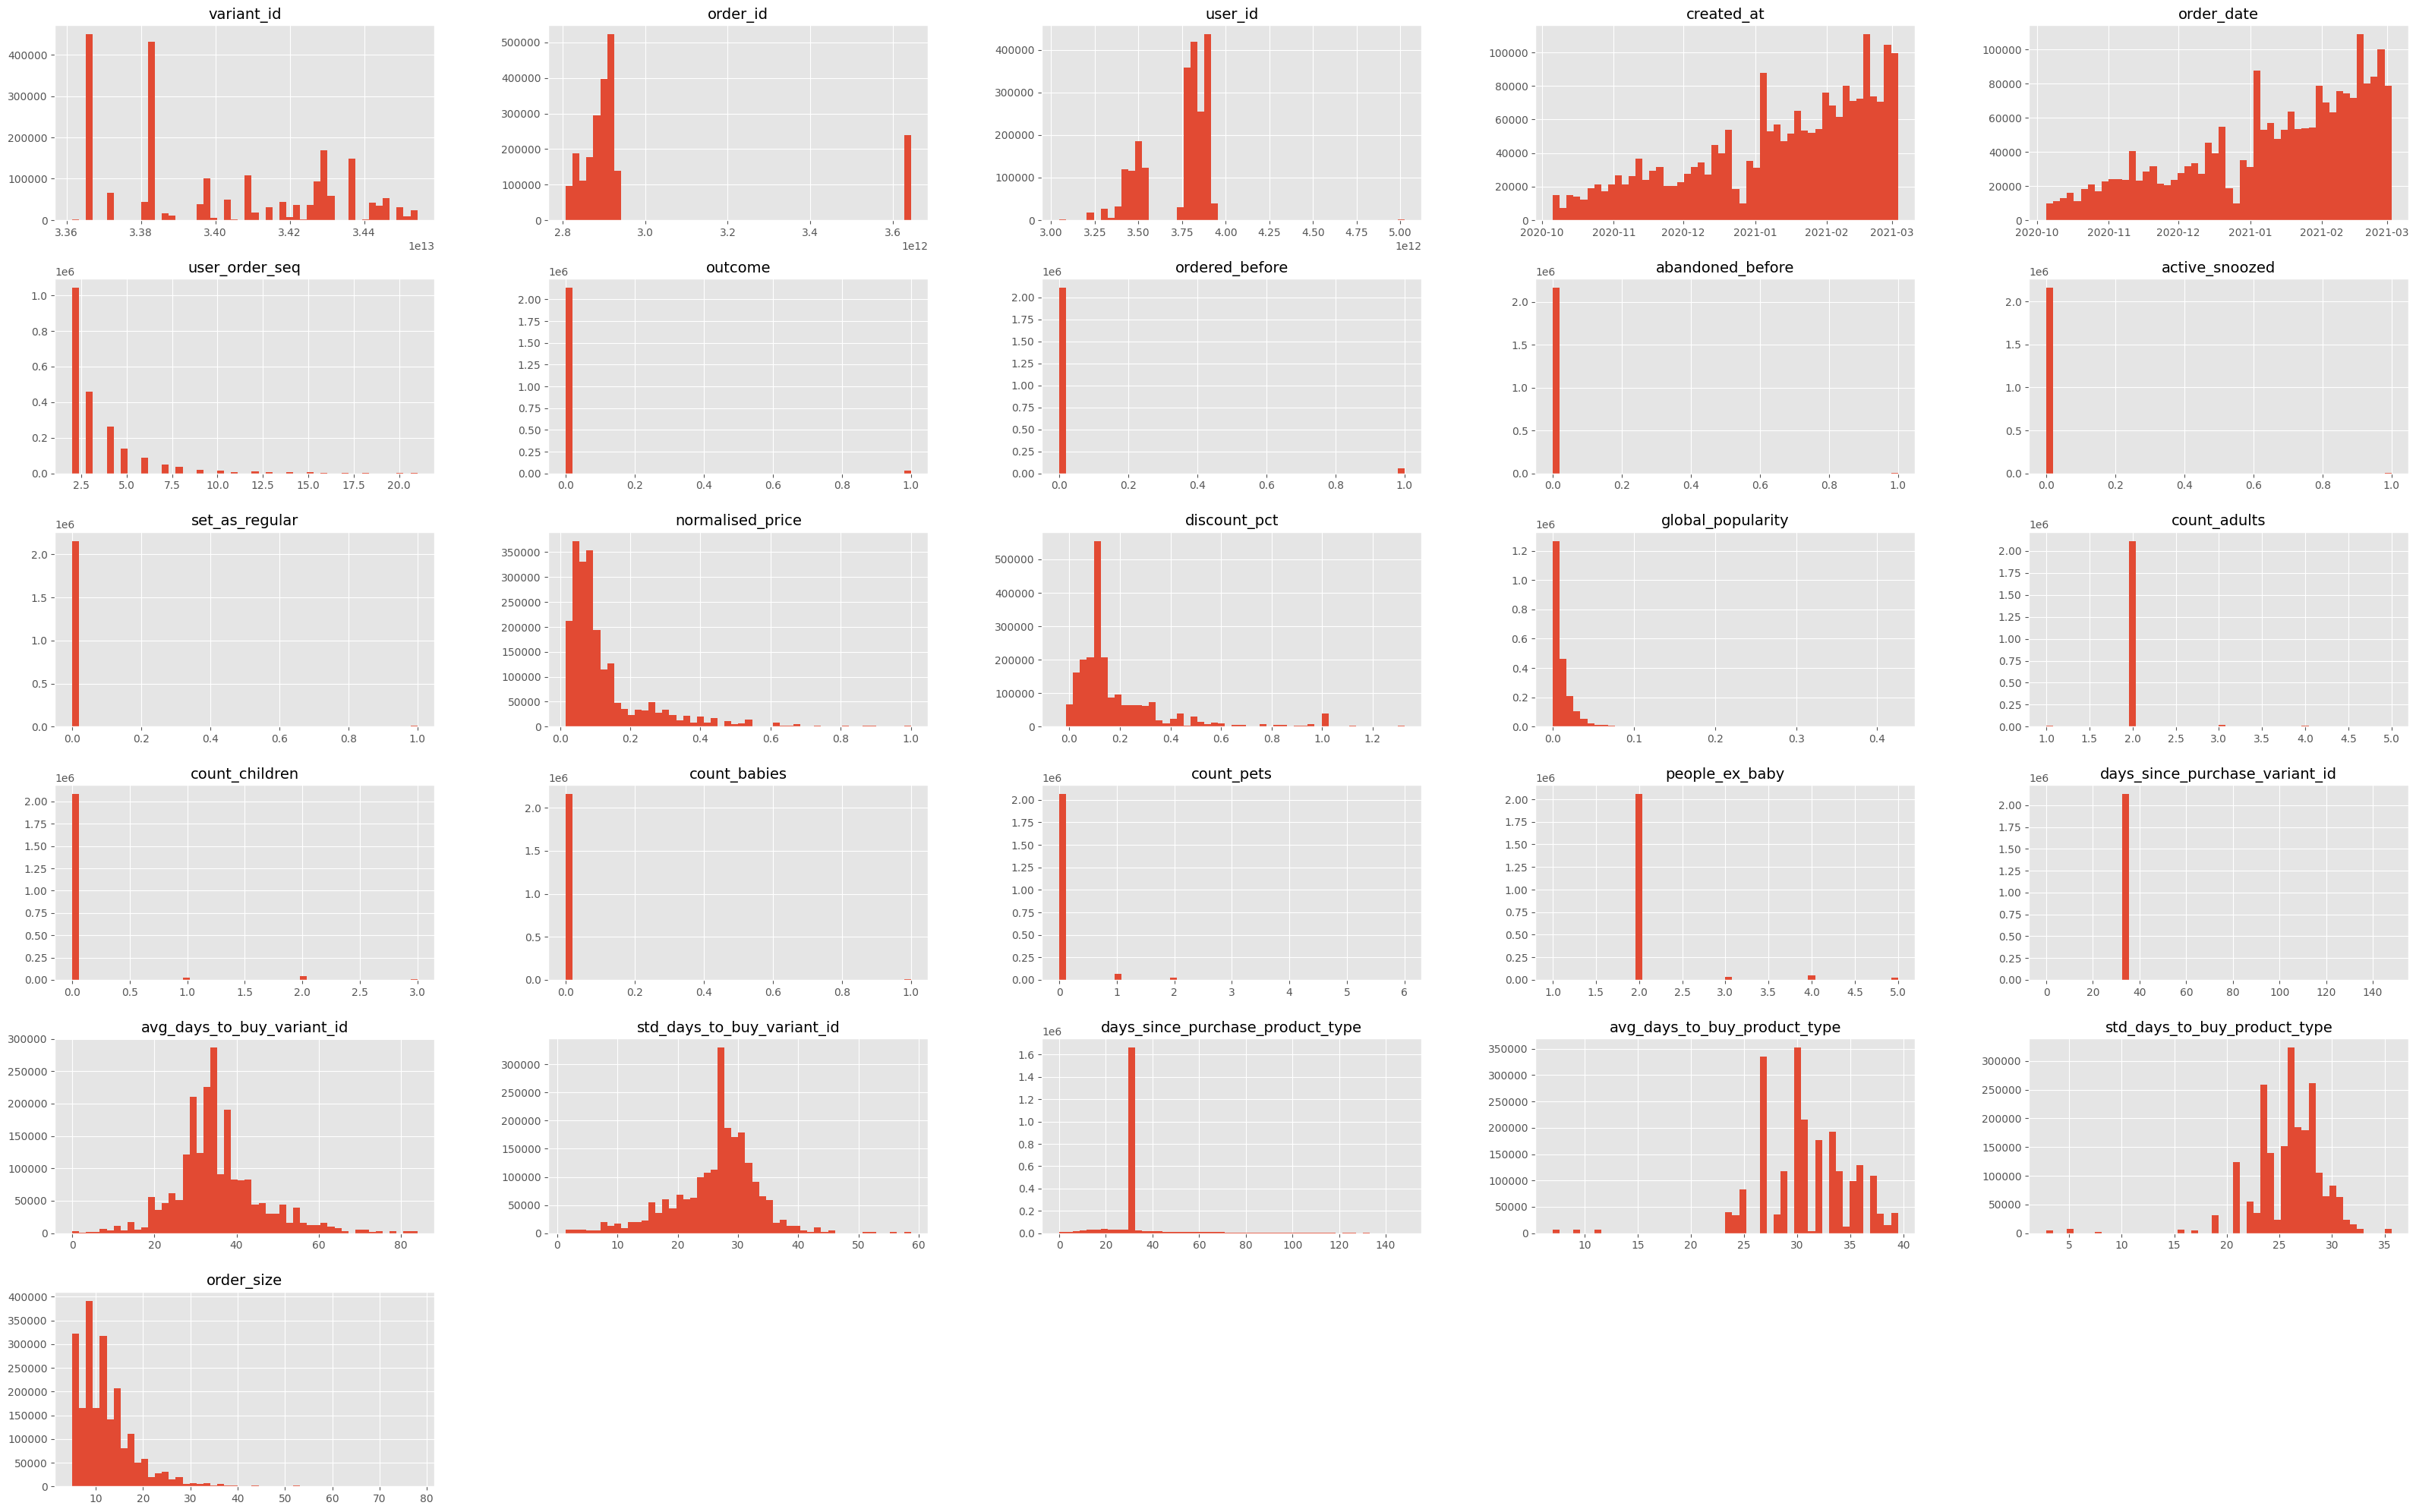

In [18]:
# extra code – the next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

df_orders.hist(bins=50, figsize=(40,25))

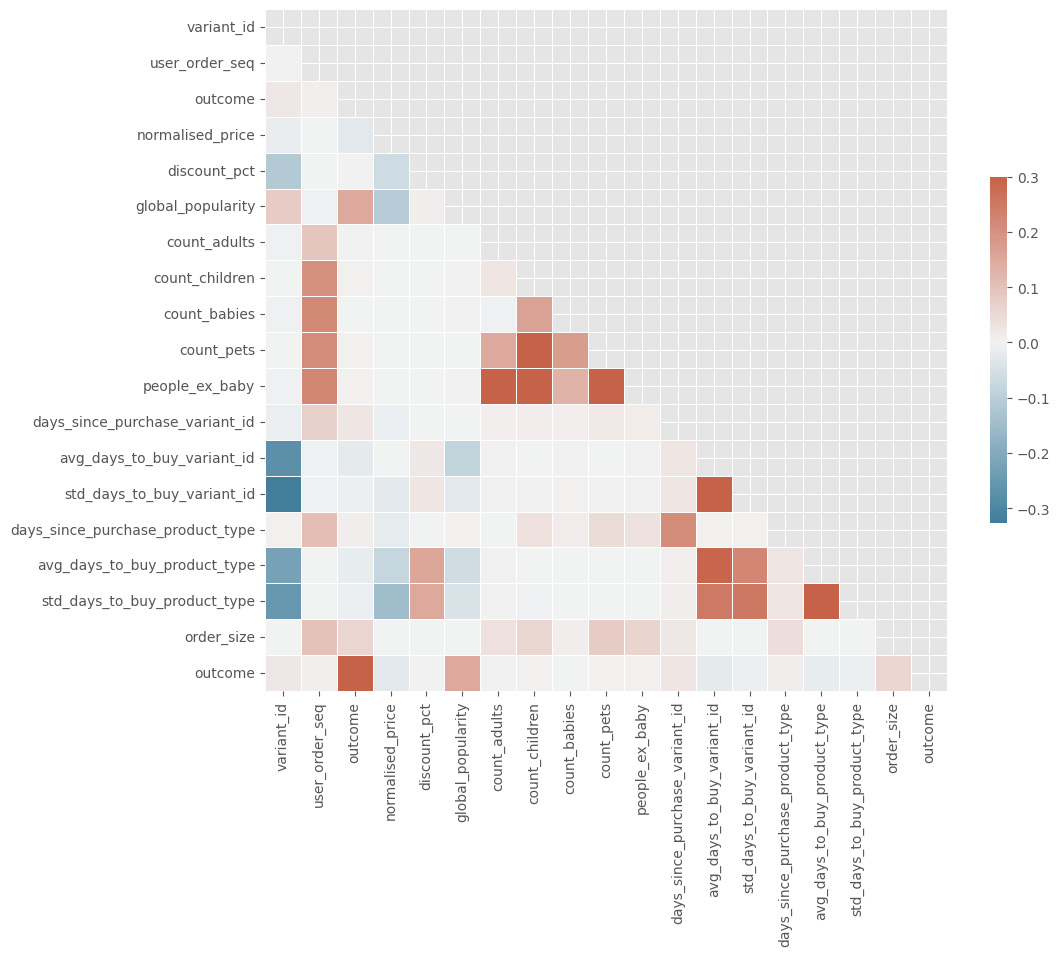

In [20]:
# Correlation matrix

columns = numerical_cols + label_col

def plot_correlation_matrix(df: pd.DataFrame, columns: list):
    # Compute the correlation matrix
    corr = df[columns].corr()

    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Set up the matplotlib figure
    fig, ax = plt.subplots (figsize=(11, 9))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette (230, 20, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,# annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
    
plot_correlation_matrix(df_orders, columns)

No hay correlaciones muy marcadas por lo que no vamos a eliminar ninguna columna

## Create train and test sets

Puntos a tener en cuenta
- Hacer el split por order_id - No puede haber un order_id en train y test
- Debemos tener en cuenta las fechas -  Ventas futuras de un mismo usuario se verán influenciadas por ventas pasadas (producto previamente en abandoned_cart o si un producto se ha comprado recientemente)

O hacer cross_validation

In [7]:
# Before splitting the data we'll hanlde datetimes

### Extract components of datetimes
df_orders = df_orders.drop('created_at', axis=1) # I'll only keep order_date as they display almost the same info

df_orders['order_year'] = df_orders['order_date'].dt.year
df_orders['order_month'] = df_orders['order_date'].dt.month
df_orders['order_day_of_week'] = df_orders['order_date'].dt.dayofweek 

df_orders = df_orders.drop('order_date', axis=1)

In [8]:
def split_by_order_id(df, test_size=0.2, validation_size=0.2, random_state=42):
    """
    Splits a DataFrame into train, validation, and test sets based on unique order IDs.

    Args:
        df (pd.DataFrame): The input DataFrame.
        test_size (float, optional): Proportion of the dataset to include in the test set.
                                     Defaults to 0.2.
        validation_size (float, optional): Proportion of the dataset to include in the validation set.
                                           Defaults to 0.2.
        random_state (int, optional): Controls the randomness of the split. 
                                      Set for reproducible results. Defaults to None.

    Returns:
        tuple: A tuple containing three DataFrames: (train_df, validation_df, test_df)
    """

    # Get unique order IDs
    unique_order_ids = df['order_id'].unique()

    # Split order IDs into train and test groups 
    train_order_ids, test_order_ids = train_test_split(unique_order_ids, 
                                                       test_size=test_size, 
                                                       random_state=random_state)

    # Optionally, split train order IDs further into train and validation groups
    if validation_size > 0:
        train_order_ids, validation_order_ids = train_test_split(train_order_ids,
                                                                 test_size=validation_size / (1 - test_size),
                                                                 random_state=random_state)

    # Create split masks
    train_mask = df['order_id'].isin(train_order_ids)
    validation_mask = df['order_id'].isin(validation_order_ids)
    test_mask = df['order_id'].isin(test_order_ids)

    # Split the DataFrame based on masks
    train_df = df[train_mask]
    validation_df = df[validation_mask]
    test_df = df[test_mask]

    return train_df, validation_df, test_df

train_df, validation_df, test_df = split_by_order_id(df_orders)

### Create a baseline model

In [37]:
### Label Encoder
encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    train_df[col] = le.fit_transform(train_df[col])
    encoders[col] = le

# Save the encoding to reuse it in validation and test
with open(data_path + 'label_encoders.pkl', 'wb') as f:
    pickle.dump(encoders, f)

# ------------------ Model Training ------------------
    
X_train = train_df.drop(label_col, axis=1)
y_train = train_df[label_col]

# Fit the LogisticRegression model
log_reg = LogisticRegression() 
log_reg.fit(X_train, y_train) 

# ------------------ Classification ------------------

# Encode test data
with open(data_path + 'label_encoders.pkl', 'rb') as f:
    encoders = pickle.load(f)

for col in categorical_cols: 
    validation_df[col] = encoders[col].transform(validation_df[col])

X_val = validation_df.drop(label_col, axis=1)
y_val = validation_df[label_col]

# Make predictions
y_pred = log_reg.predict(X_val) 


/tmp/ipykernel_70197/1181816414.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df[col] = le.fit_transform(train_df[col])
/tmp/ipykernel_70197/1181816414.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df[col] = le.fit_transform(train_df[col])
/home/agrande/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = c

In [49]:
def model_performance_metrics(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    print(f'Accuracy: {accuracy}')
    print(f'Confusion Matrix:\n {conf_matrix}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1-Score: {f1}')
    print(f'ROC AUC: {roc_auc}')

model_performance_metrics(y_val, y_pred)

/home/agrande/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.9856056874186215
Confusion Matrix:
 [[426169      0]
 [  6224      0]]
Precision: 0.0
Recall: 0.0
F1-Score: 0.0
ROC AUC: 0.5


Como se podía esperar, el modelo predice sólo 0s ya que las clases están totalmente desbalanceadas. El siguiente paso será aplicar un undersampling para igualar las clases

## Undersampling

En este paso voy a aplicar un undersampling para tener las clases balanceadas al 50%

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

# Example: Sample the majority class down to the size of the minority class
rus = RandomUnderSampler(random_state=42)  # Set random_state for reproducibility
X_resampled, y_resampled = rus.fit_resample(X, y) 


In [22]:
### Label Encoder
encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    train_df[col] = le.fit_transform(train_df[col])
    encoders[col] = le

# Save the encoding to reuse it in validation and test
with open(data_path + 'label_encoders.pkl', 'wb') as f:
    pickle.dump(encoders, f)

# ------------------ Model Training ------------------
    
X_train = train_df.drop(label_col, axis=1)
y_train = train_df[label_col]

# Undersampling
rus = RandomUnderSampler(random_state=42)  # Set random_state for reproducibility
X_resampled, y_resampled = rus.fit_resample(X_train, y_train) 

# Fit the LogisticRegression model
log_reg = LogisticRegression() 
log_reg.fit(X_resampled, y_resampled) 

# ------------------ Classification ------------------

# Encode test data
with open(data_path + 'label_encoders.pkl', 'rb') as f:
    encoders = pickle.load(f)

for col in categorical_cols: 
    validation_df[col] = encoders[col].transform(validation_df[col])

X_val = validation_df.drop(label_col, axis=1)
y_val = validation_df[label_col]

# Make predictions
y_pred = log_reg.predict(X_val) 

ValueError: invalid literal for int() with base 10: 'ricepastapulses'

## Frequency encoding

In [ ]:
def apply_frequency_encoding(df, columns, outcome_condition='outcome'):
    """
    Applies frequency encoding to specified columns in a DataFrame. 
    Frequency is calculated only when a particular condition is met.

    Args:
        df (pd.DataFrame): The input DataFrame.
        columns (list): List of columns to apply frequency encoding to.
        outcome_condition (str, optional): Column name containing the condition for 
                                           calculating frequency. Defaults to 'outcome'.

    Returns:
        pd.DataFrame: The DataFrame with frequency-encoded columns.
    """

    for col in columns:
        # Filter for rows where the outcome condition is True
        temp_df = df[df[outcome_condition] == 1] 

        # Calculate value frequencies
        frequencies = temp_df[col].value_counts(normalize=True) 

        # Create a mapping dictionary
        freq_map = frequencies.to_dict()

        # Apply frequency encoding to the entire column
        df[f'{col}_freq_enc'] = df[col].map(freq_map)

    return df

apply_frequency_encoding(train_df, categorical_cols, outcome_condition='outcome')


# TEST

In [12]:
### Label Encoder
encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    train_df[col] = le.fit_transform(train_df[col])
    encoders[col] = le

# Save the encoding to reuse it in validation and test
with open(data_path + 'label_encoders.pkl', 'wb') as f:
    pickle.dump(encoders, f)

# ------------------ Model Training ------------------
    
X_train = train_df.drop(label_col, axis=1)
y_train = train_df[label_col]

In [13]:
rus = RandomUnderSampler(random_state=42)  # Set random_state for reproducibility
X_resampled, y_resampled = rus.fit_resample(X_train, y_train) 

In [14]:
len(X_train)

1299126

In [15]:
len(X_resampled)

37782

In [16]:
len(y_train)

1299126